# Linear model for Boston

You try to process a very similar dataset to the lecture. This time the house prices are from Portland and are relatively recent.

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

To make things easier, only some columns were selected from the original dataset and the number of records was also significantly reduced.

!!! For this reason, the subset created may not statistically match the original dataset.

A bonus task is to process the original dataset.

## Sub dataset
- Data = structure with filled data
- m = number of rows = 100
- x's = input variable / features
- y's = output variable / target
- (x, y) = one row from training dataset
- x(2) = (4, 5, 3374, 85)
- y(2) = 1 050 000

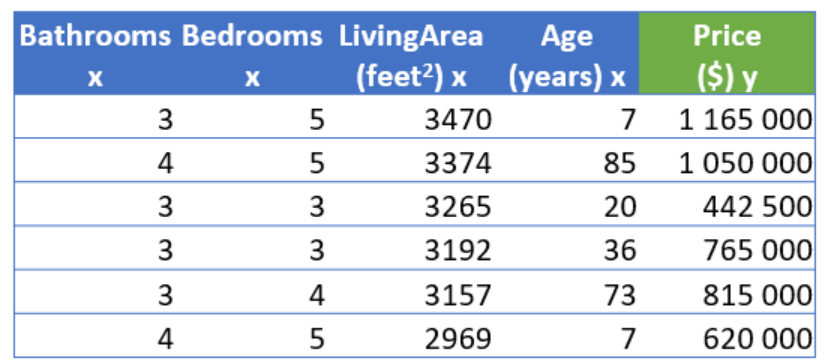

# Task
- Create a regression linearization model from the parameters you selected last exercise
- Standardize the data before processing
- Create the model manually
- Create the model using scikit-learn

# Data loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv ("..\\dataset\\portland_filtered.csv",  sep=';')

# Linear model without using libraries
- Create a linear regression model manually without the help of external libraries
- List its parameters
- List its scores for training and validation data
- Plot a learning history graph
- Visualize the model

Mean after standardization: -0.00
Std after standardization: 1.00

--- MANUAL IMPLEMENTATION ---
Manual Parameters -> Weights: [120833.42658531], Bias: 515503.03
Manual Performance -> MSE: 1.38e+10, R2 Score: 0.6503


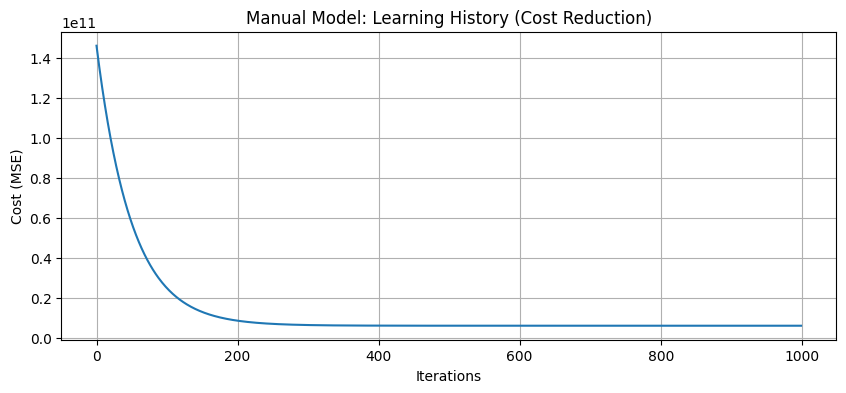

In [3]:
# Drop NaNs just in case
data = data.dropna(subset=['livingArea', 'price'])

# Select variables
# X = Features (Input), y = Target (Output)
X_original = data[['livingArea']].values
y_original = data['price'].values

# Split data (80% train, 20% test)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Formula: z = (x - mean) / std
mu = X_train_raw.mean()
sigma = X_train_raw.std()

X_train = (X_train_raw - mu) / sigma
X_test = (X_test_raw - mu) / sigma

# We also visualize the effect
print(f"Mean after standardization: {X_train.mean():.2f}")
print(f"Std after standardization: {X_train.std():.2f}")

print("\n--- MANUAL IMPLEMENTATION ---")

class ManualLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.lr = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent Loop
        for i in range(self.iterations):
            # 1. Prediction
            y_pred = np.dot(X, self.weights) + self.bias

            # 2. Calculate Cost (MSE) and store it
            cost = (1/(2*n_samples)) * np.sum((y_pred - y)**2)
            self.cost_history.append(cost)

            # 3. Gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # 4. Update Parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train Manual Model
manual_model = ManualLinearRegression(learning_rate=0.01, iterations=1000)
manual_model.fit(X_train, y_train)

# Evaluate Manual Model
y_pred_manual = manual_model.predict(X_test)
mse_manual = mean_squared_error(y_test, y_pred_manual)
r2_manual = r2_score(y_test, y_pred_manual)

print(f"Manual Parameters -> Weights: {manual_model.weights}, Bias: {manual_model.bias:.2f}")
print(f"Manual Performance -> MSE: {mse_manual:.2e}, R2 Score: {r2_manual:.4f}")

# Plot Learning History
plt.figure(figsize=(10, 4))
plt.plot(manual_model.cost_history)
plt.title("Manual Model: Learning History (Cost Reduction)")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()


# Linear model using scikit-learn
- Create a linear regression model manually without the help of external libraries
- List its parameters
- List its scores for training and validation data
- Plot a learning history graph
- Visualize the model

Sklearn Parameters -> Coefficients: [120838.64334028], Intercept: 515525.29
Sklearn Performance -> MSE: 1.38e+10, R2 Score: 0.6503


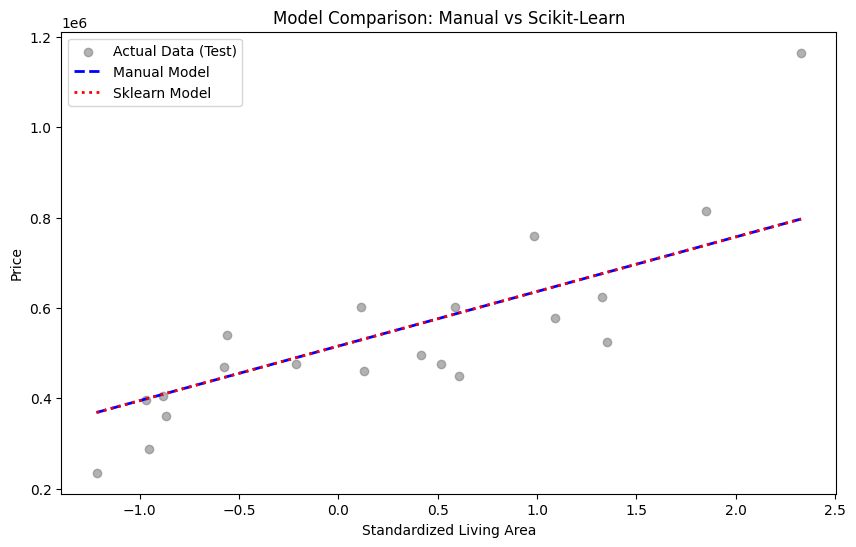

In [4]:
# Train Sklearn Model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

# Evaluate Sklearn Model
y_pred_sklearn = sklearn_model.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f"Sklearn Parameters -> Coefficients: {sklearn_model.coef_}, Intercept: {sklearn_model.intercept_:.2f}")
print(f"Sklearn Performance -> MSE: {mse_sklearn:.2e}, R2 Score: {r2_sklearn:.4f}")

# Comparison
plt.figure(figsize=(10, 6))

# Plot training data points
plt.scatter(X_test, y_test, color='gray', alpha=0.6, label='Actual Data (Test)')

# Plot regression lines
# We sort X_test for cleaner line plotting
sorted_idx = np.argsort(X_test.flatten())
plt.plot(X_test[sorted_idx], y_pred_manual[sorted_idx], color='blue', linestyle='--', linewidth=2, label='Manual Model')
plt.plot(X_test[sorted_idx], y_pred_sklearn[sorted_idx], color='red', linestyle=':', linewidth=2, label='Sklearn Model')

plt.title("Model Comparison: Manual vs Scikit-Learn")
plt.xlabel("Standardized Living Area")
plt.ylabel("Price")
plt.legend()
plt.show()